In [91]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../code/functions')

import cv2
import pickle

from connectLib import otsuVox
from connectLib import clusterThresh
from random import randrange as rand
from cluster import Cluster

In [92]:
dataFrameA = pandas.read_csv('results.csv', sep=',', header=None)
dataFrameB = pandas.read_csv('results2.csv', sep=',', header=None)

In [93]:
data = pandas.concat([dataFrameA, dataFrameB]).as_matrix()[1:]

In [94]:
data

array([['sparse_gradient_0', 0.0008033456985560002, 0.276422764228,
        0.00160203552749],
       ['dense_uniform_0', 0.00297769893563, 0.0608414239482,
        0.005677528463140001],
       ['dense_gradient_0', 0.00297769893563, 0.0608414239482,
        0.005677528463140001],
       ..., 
       ['sparse_gradient_0_neighborhood_2_2_60_adaptive_10_10_10_99',
        0.0323370896619, 0.9, 0.0624310263282],
       ['dense_uniform_0_neighborhood_2_2_60_adaptive_10_10_10_99',
        0.373590982287, 0.858299595142, 0.5205868032769999],
       ['dense_gradient_0_neighborhood_2_2_60_adaptive_10_10_10_99',
        0.371167294244, 0.8502024291500001, 0.516743340109]], dtype=object)

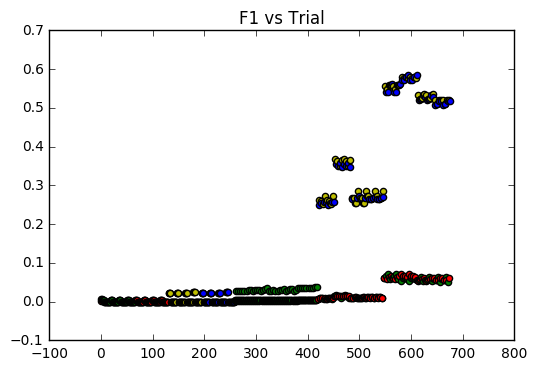

In [95]:
fig = plt.figure()
typeDict = {
    'sparse_gradient': 'r',
    'sparse_uniform': 'g',
    'dense_gradient': 'b',
    'dense_uniform': 'y'
}
for trial, result in enumerate(data):
    groups = result[0].split('_')
    volString = groups[0]+ '_' + groups[1]
    plt.scatter(trial, result[3], c=typeDict[volString])

plt.title('F1 vs Trial')
plt.show()

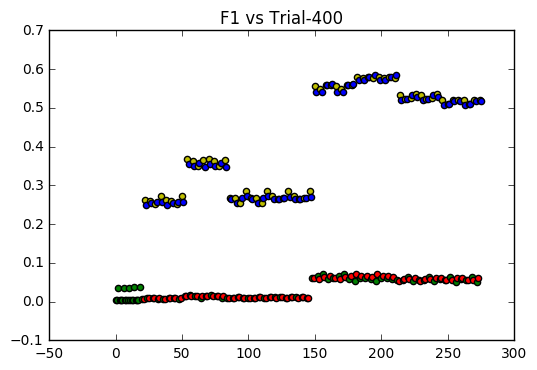

In [111]:
fig = plt.figure()
typeDict = {
    'sparse_gradient': 'r',
    'sparse_uniform': 'g',
    'dense_gradient': 'b',
    'dense_uniform': 'y'
}
for trial, result in enumerate(data[400:]):
    groups = result[0].split('_')
    volString = groups[0]+ '_' + groups[1]
    plt.scatter(trial, result[3], c=typeDict[volString])

plt.title('F1 vs Trial-400')
plt.show()

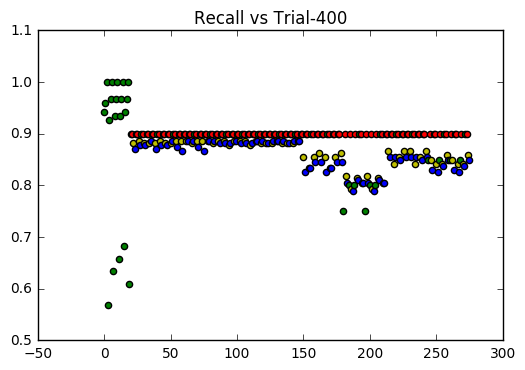

In [110]:
fig = plt.figure()
typeDict = {
    'sparse_gradient': 'r',
    'sparse_uniform': 'g',
    'dense_gradient': 'b',
    'dense_uniform': 'y'
}
for trial, result in enumerate(data[400:]):
    groups = result[0].split('_')
    volString = groups[0]+ '_' + groups[1]
    plt.scatter(trial, result[2], c=typeDict[volString])
700
plt.title('Recall vs Trial-400')
plt.show()

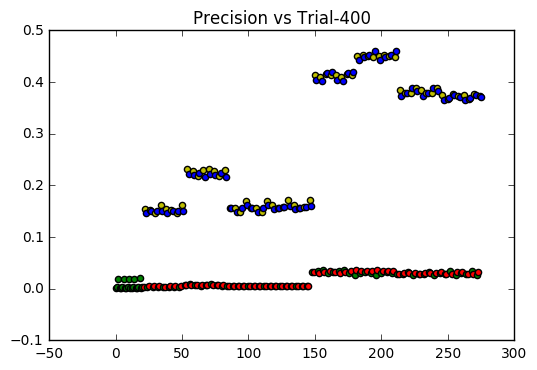

In [109]:
fig = plt.figure()
typeDict = {
    'sparse_gradient': 'r',
    'sparse_uniform': 'g',
    'dense_gradient': 'b',
    'dense_uniform': 'y'
}
for trial, result in enumerate(data[400:]):
    groups = result[0].split('_')
    volString = groups[0]+ '_' + groups[1]
    plt.scatter(trial, result[1], c=typeDict[volString])

plt.title('Precision vs Trial-400')
plt.show()

In [112]:
for trial, result in enumerate(data[400:]):
    if result[3] > .2:
        print result[0]

dense_uniform_0_neighborhood_2_2_30_adaptive_4_4_4_96
dense_gradient_0_neighborhood_2_2_30_adaptive_4_4_4_96
dense_uniform_0_neighborhood_2_2_40_adaptive_4_4_4_96
dense_gradient_0_neighborhood_2_2_40_adaptive_4_4_4_96
dense_uniform_0_neighborhood_2_2_50_adaptive_4_4_4_96
dense_gradient_0_neighborhood_2_2_50_adaptive_4_4_4_96
dense_uniform_0_neighborhood_2_2_60_adaptive_4_4_4_96
dense_gradient_0_neighborhood_2_2_60_adaptive_4_4_4_96
dense_uniform_0_neighborhood_2_2_30_adaptive_4_4_4_96
dense_gradient_0_neighborhood_2_2_30_adaptive_4_4_4_96
dense_uniform_0_neighborhood_2_2_40_adaptive_4_4_4_96
dense_gradient_0_neighborhood_2_2_40_adaptive_4_4_4_96
dense_uniform_0_neighborhood_2_2_50_adaptive_4_4_4_96
dense_gradient_0_neighborhood_2_2_50_adaptive_4_4_4_96
dense_uniform_0_neighborhood_2_2_60_adaptive_4_4_4_96
dense_gradient_0_neighborhood_2_2_60_adaptive_4_4_4_96
dense_uniform_0_neighborhood_2_2_30_adaptive_6_6_6_96
dense_gradient_0_neighborhood_2_2_30_adaptive_6_6_6_96
dense_uniform_0_nei

In [120]:
topResultsG = []
topResultsU = []
for trial, result in enumerate(data[400:]):
    if result[3] > .2:
        if 'gradient' in result[0]:
            topResultsG.append(result)
        else:
            topResultsU.append(result)

In [122]:
nIdx = {
    '30':0,
    '40':1,
    '50':2,
    '60':3
}

aIdx = {
    '4_96':0,
    '6_96':1,
    '8_96':2,
    '10_96':3,
    '4_99':4,
    '6_99':5,
    '8_99':6,
    '10_99':7,
}

results = np.empty((4, 8))
for result in topResultsU:
    groups = result[0].split('_')
    y = groups[6]
    x = groups[10] + '_' + groups[11]
    results[nIdx[y]][aIdx[x]] = result[3]

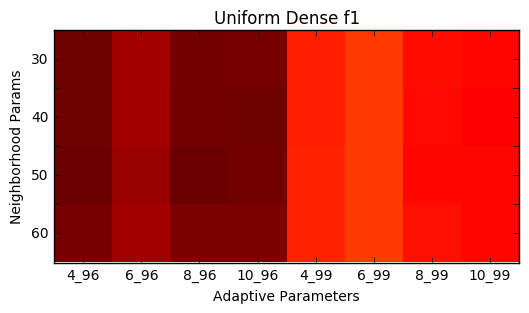

In [131]:
plt.figure()
fig, ax = plt.subplots()
plt.imshow(results, interpolation='nearest', cmap='hot', vmin=0, vmax=1)
plt.title('Uniform Dense f1')
ax.set_xlabel('Adaptive Parameters')
ax.set_ylabel('Neighborhood Params')
ax.set_xticklabels(['', '4_96', '6_96', '8_96', '10_96', '4_99', '6_99', '8_99', '10_99'])
ax.set_yticklabels(['', '30', '', '40', '', '50', '', '60'])
plt.show()

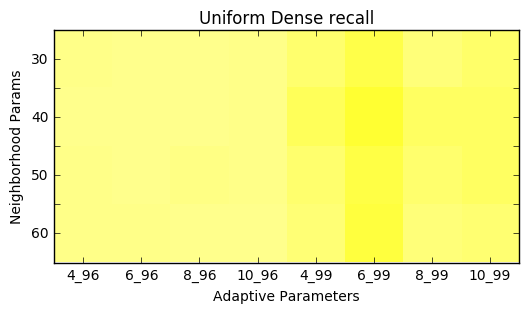

In [129]:
results = np.empty((4, 8))
for result in topResultsU:
    groups = result[0].split('_')
    y = groups[6]
    x = groups[10] + '_' + groups[11]
    results[nIdx[y]][aIdx[x]] = result[2]
    
plt.figure()
fig, ax = plt.subplots()
plt.imshow(results, interpolation='nearest', cmap='hot', vmin=0, vmax=1)
plt.title('Uniform Dense recall')
ax.set_xlabel('Adaptive Parameters')
ax.set_ylabel('Neighborhood Params')
ax.set_xticklabels(['', '4_96', '6_96', '8_96', '10_96', '4_99', '6_99', '8_99', '10_99'])
ax.set_yticklabels(['', '30', '', '40', '', '50', '', '60'])
plt.show()

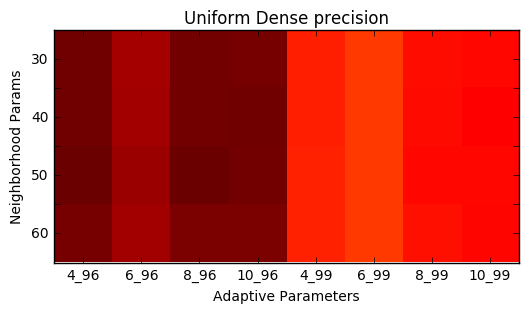

In [130]:
results = np.empty((4, 8))
for result in topResultsU:
    groups = result[0].split('_')
    y = groups[6]
    x = groups[10] + '_' + groups[11]
    results[nIdx[y]][aIdx[x]] = result[1]
    
plt.figure()
fig, ax = plt.subplots()
plt.imshow(results, interpolation='nearest', cmap='hot', vmin=0, vmax=1)
plt.title('Uniform Dense precision')
ax.set_xlabel('Adaptive Parameters')
ax.set_ylabel('Neighborhood Params')
ax.set_xticklabels(['', '4_96', '6_96', '8_96', '10_96', '4_99', '6_99', '8_99', '10_99'])
ax.set_yticklabels(['', '30', '', '40', '', '50', '', '60'])
plt.show()

In [134]:
results = np.empty((4, 8))
for result in topResultsG:
    groups = result[0].split('_')
    y = groups[6]
    x = groups[10] + '_' + groups[11]
    results[nIdx[y]][aIdx[x]] = result[3]

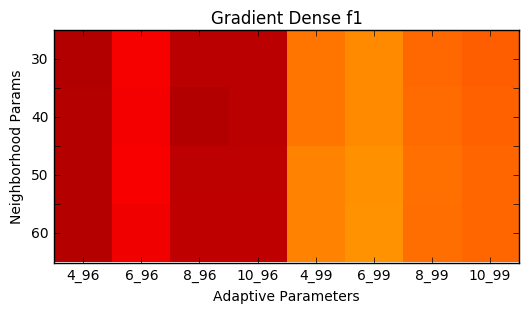

In [136]:
plt.figure()
fig, ax = plt.subplots()
plt.imshow(results, interpolation='nearest', cmap='hot', vmin=0, vmax=1)
plt.title('Gradient Dense f1')
ax.set_xlabel('Adaptive Parameters')
ax.set_ylabel('Neighborhood Params')
ax.set_xticklabels(['', '4_96', '6_96', '8_96', '10_96', '4_99', '6_99', '8_99', '10_99'])
ax.set_yticklabels(['', '30', '', '40', '', '50', '', '60'])
plt.show()

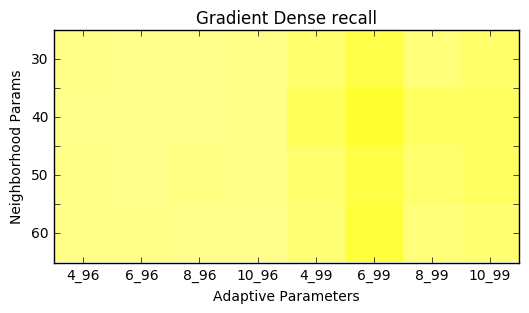

In [137]:
results = np.empty((4, 8))
for result in topResultsU:
    groups = result[0].split('_')
    y = groups[6]
    x = groups[10] + '_' + groups[11]
    results[nIdx[y]][aIdx[x]] = result[2]
    
plt.figure()
fig, ax = plt.subplots()
plt.imshow(results, interpolation='nearest', cmap='hot', vmin=0, vmax=1)
plt.title('Gradient Dense recall')
ax.set_xlabel('Adaptive Parameters')
ax.set_ylabel('Neighborhood Params')
ax.set_xticklabels(['', '4_96', '6_96', '8_96', '10_96', '4_99', '6_99', '8_99', '10_99'])
ax.set_yticklabels(['', '30', '', '40', '', '50', '', '60'])
plt.show()

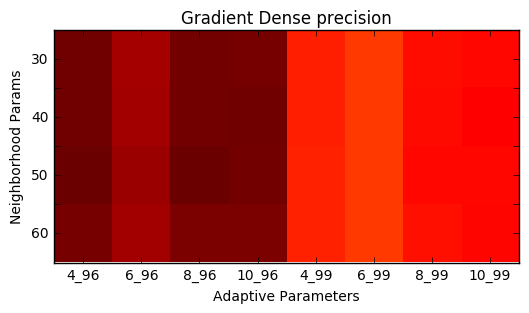

In [138]:
results = np.empty((4, 8))
for result in topResultsU:
    groups = result[0].split('_')
    y = groups[6]
    x = groups[10] + '_' + groups[11]
    results[nIdx[y]][aIdx[x]] = result[1]
    
plt.figure()
fig, ax = plt.subplots()
plt.imshow(results, interpolation='nearest', cmap='hot', vmin=0, vmax=1)
plt.title('Gradient Dense precision')
ax.set_xlabel('Adaptive Parameters')
ax.set_ylabel('Neighborhood Params')
ax.set_xticklabels(['', '4_96', '6_96', '8_96', '10_96', '4_99', '6_99', '8_99', '10_99'])
ax.set_yticklabels(['', '30', '', '40', '', '50', '', '60'])
plt.show()